In [106]:
import numpy as np
import pandas as pd
import matplotlib as mp
from collections import OrderedDict
import math as math

In [107]:
import yfinance as yf

In [108]:
start_d = "01/01/2015"
end_d = "01/01/2021"

In [109]:
stocks = { 
    'BHP', 'NPCPF', 'VITFF', 
    'GOOG', 'ROKU', 'OPRA', 
    'LVMUY', 'EXPE', 'TUP', 
    'JPM', 'MET', 'ARES', 
    'PLD', 'DITTF', 'INN', 
    'PG', 'AJINY', 'DFIHY', 
    'UNH', 'LH', 'NVTA', 
    'NEE', 'TKGSY', 'AZRE', 
    'XOM', 'VVV', 'AROC', 
    'UPS', 'CMI', 'ROCK', 
    'AAPL', 'CAJ', 'APPN'}



In [110]:
sector_dict = {}
for stock in stocks:
    ticker = yf.Ticker(stock)
    sector_dict[stock] = ticker.info['sector']

In [111]:
#Successfully created dictionary with stock and corresponding sector
print(sector_dict)

{'ROCK': 'Industrials', 'VITFF': 'Basic Materials', 'LVMUY': 'Consumer Cyclical', 'NEE': 'Utilities', 'JPM': 'Financial Services', 'ROKU': 'Communication Services', 'NPCPF': 'Basic Materials', 'CAJ': 'Technology', 'TUP': 'Consumer Cyclical', 'GOOG': 'Communication Services', 'XOM': 'Energy', 'APPN': 'Technology', 'MET': 'Financial Services', 'PG': 'Consumer Defensive', 'AZRE': 'Utilities', 'NVTA': 'Healthcare', 'ARES': 'Financial Services', 'AROC': 'Energy', 'AAPL': 'Technology', 'LH': 'Healthcare', 'BHP': 'Basic Materials', 'TKGSY': 'Utilities', 'PLD': 'Real Estate', 'DFIHY': 'Consumer Defensive', 'INN': 'Real Estate', 'AJINY': 'Consumer Defensive', 'DITTF': 'Real Estate', 'UPS': 'Industrials', 'UNH': 'Healthcare', 'EXPE': 'Consumer Cyclical', 'OPRA': 'Communication Services', 'CMI': 'Industrials', 'VVV': 'Energy'}


In [112]:
#create data frame from dictionary of sectors and format 
df = pd.DataFrame.from_dict(sector_dict, orient = "index", columns = ['Sector'])

In [113]:
df

,Sector
ROCK,Industrials
VITFF,Basic Materials
LVMUY,Consumer Cyclical
NEE,Utilities
JPM,Financial Services
ROKU,Communication Services
NPCPF,Basic Materials
CAJ,Technology
TUP,Consumer Cyclical
GOOG,Communication Services


In [114]:
#Create dataframe of each sector and how many of each there are (mainly for checking that code worked)
sector_count = df.Sector.value_counts()
sector_count

Industrials               3
Technology                3
Real Estate               3
Basic Materials           3
Communication Services    3
Utilities                 3
Energy                    3
Healthcare                3
Financial Services        3
Consumer Cyclical         3
Consumer Defensive        3
Name: Sector, dtype: int64

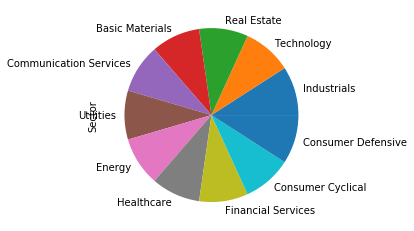

In [115]:
#Make a pie chart (just for fun lol)
plot = sector_count.plot.pie(y=sector_count[1])

In [116]:
#Create dataframe of dummy variables :)
#Export as csv for model
df_dummies = pd.get_dummies(df, columns=['Sector'])
df_dummies

,Sector_Basic Materials,Sector_Communication Services,Sector_Consumer Cyclical,Sector_Consumer Defensive,Sector_Energy,Sector_Financial Services,Sector_Healthcare,Sector_Industrials,Sector_Real Estate,Sector_Technology,Sector_Utilities
ROCK,0,0,0,0,0,0,0,1,0,0,0
VITFF,1,0,0,0,0,0,0,0,0,0,0
LVMUY,0,0,1,0,0,0,0,0,0,0,0
NEE,0,0,0,0,0,0,0,0,0,0,1
JPM,0,0,0,0,0,1,0,0,0,0,0
ROKU,0,1,0,0,0,0,0,0,0,0,0
NPCPF,1,0,0,0,0,0,0,0,0,0,0
CAJ,0,0,0,0,0,0,0,0,0,1,0
TUP,0,0,1,0,0,0,0,0,0,0,0
GOOG,0,1,0,0,0,0,0,0,0,0,0


In [117]:
sectors = df.Sector.unique()
sectors

array(['Industrials', 'Basic Materials', 'Consumer Cyclical', 'Utilities',
       'Financial Services', 'Communication Services', 'Technology',
       'Energy', 'Consumer Defensive', 'Healthcare', 'Real Estate'],
      dtype=object)

In [118]:
sector_key_dict = {}
for sector in sectors:
    loc = np.where(sectors == sector)
    sector_key_dict[sector] = np.array(loc).item()
print(sector_key_dict)

{'Industrials': 0, 'Basic Materials': 1, 'Consumer Cyclical': 2, 'Utilities': 3, 'Financial Services': 4, 'Communication Services': 5, 'Technology': 6, 'Energy': 7, 'Consumer Defensive': 8, 'Healthcare': 9, 'Real Estate': 10}


In [119]:
df['Sector Index'] = np.nan
sector_array = np.array(sectors)
for i in df.index:
    df.at[i, 'Sector Index'] = sector_key_dict[df['Sector'][i]]


In [123]:
df['Sector Index'] = df['Sector Index'].astype(int)

In [124]:
df

,Sector,Sector Index
ROCK,Industrials,0
VITFF,Basic Materials,1
LVMUY,Consumer Cyclical,2
NEE,Utilities,3
JPM,Financial Services,4
ROKU,Communication Services,5
NPCPF,Basic Materials,1
CAJ,Technology,6
TUP,Consumer Cyclical,2
GOOG,Communication Services,5


In [126]:
df.to_csv("sector_classification.csv")